<a href="https://colab.research.google.com/github/irwinzebua/Berkas/blob/main/SKRIPSI_IRWIN_BACKPROPRAGATION_DAGING_KAMBING_INDONESIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Import Library and Dataset***

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
from sklearn.exceptions import ConvergenceWarning
import warnings

data = pd.read_csv('/content/Data Real.xlsx - Sheet1.csv')

data.head(10)

,provinsi,tahun,Sapi,Kerbau,Kuda,Kambing,Domba,Babi
0,ACEH,2000,25055,8773,0,23139,3361,223
1,ACEH,2001,25902,9041,0,23438,3445,241
2,ACEH,2002,18002,8012,0,0,0,0
3,ACEH,2003,23456,9355,1,16174,1644,150
4,ACEH,2004,22172,9436,1,14543,2346,150
5,ACEH,2005,19693,8906,1,14131,1990,150
6,ACEH,2006,9931,8131,0,12104,1024,0
7,ACEH,2007,27698,9532,0,29308,4503,0
8,ACEH,2008,26239,8224,0,30161,3877,0
9,ACEH,2009,35601,11345,0,44569,4086,2529


# ***Retrieve the data that you want to predict input into the dataframe***

In [2]:
#ubah dataframe sesuai column yang dibutuhkan
data  = pd.DataFrame(data[['provinsi','tahun','Kambing']])
data.head(714)

,provinsi,tahun,Kambing
0,ACEH,2000,23139
1,ACEH,2001,23438
2,ACEH,2002,0
3,ACEH,2003,16174
4,ACEH,2004,14543
...,...,...,...
709,PAPUA,2016,394
710,PAPUA,2017,351
711,PAPUA,2018,331
712,PAPUA,2019,304


# ***Check the contents of the dataset***

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   provinsi  714 non-null    object
 1   tahun     714 non-null    int64 
 2   Kambing   714 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 16.9+ KB



# ***Plot by year and province of cattle slaughter***

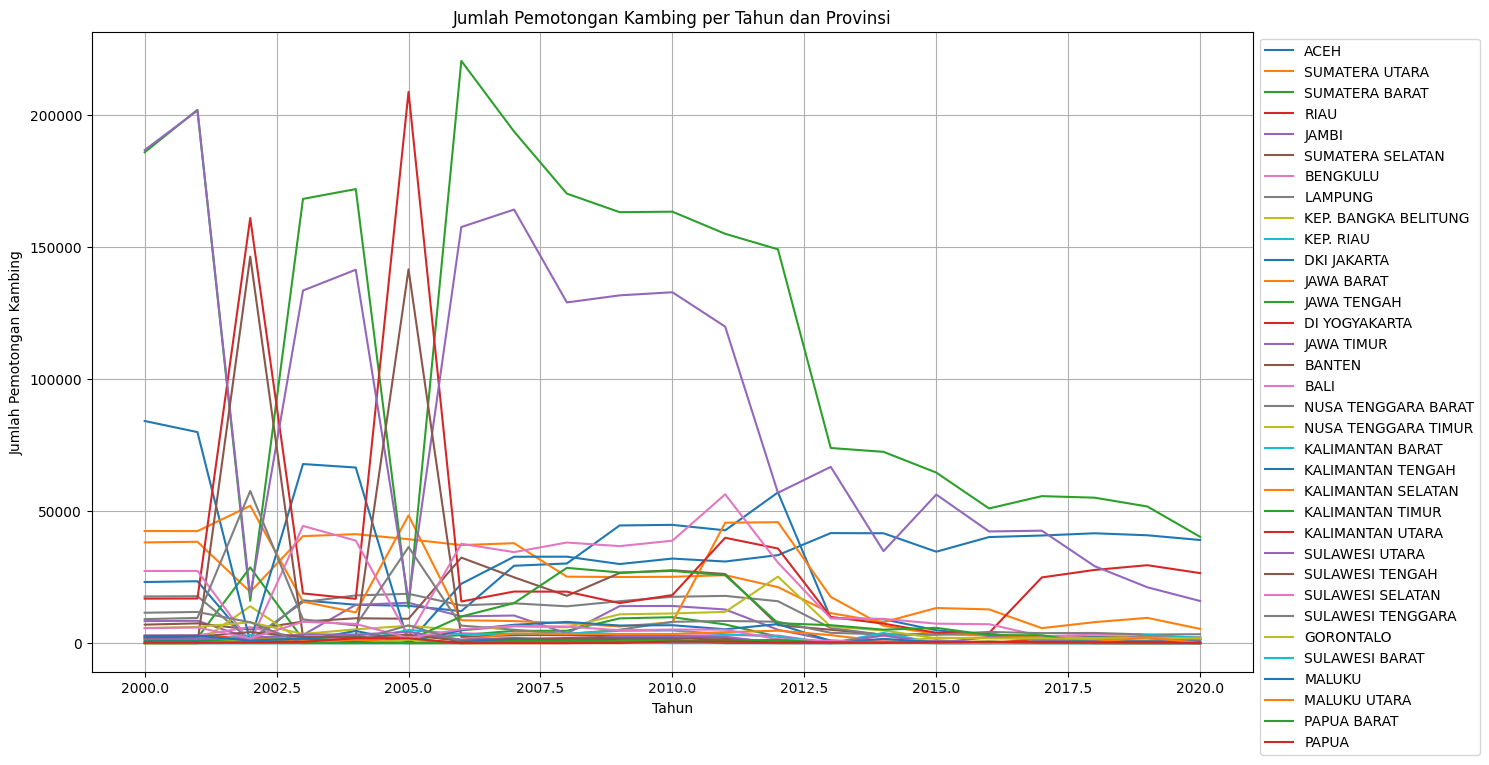

In [4]:
import matplotlib.pyplot as plt
filtered_data = data[['provinsi', 'tahun', 'Kambing']].copy()

plt.figure(figsize=(15, 8))

for provinsi in filtered_data['provinsi'].unique():
    provinsi_data = filtered_data[filtered_data['provinsi'] == provinsi]
    plt.plot(provinsi_data['tahun'], provinsi_data['Kambing'], label=provinsi)

plt.title('Jumlah Pemotongan Kambing per Tahun dan Provinsi')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Pemotongan Kambing')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

plt.tight_layout()
plt.show()

# ***Model regresi jaringan saraf tiruan dengan algoritma backpropagation Pendekatan Regresi Jaringan Saraf Tiruan (MLPRegressor) dan penskalaan fitur (MinMaxScaler)***

In [5]:
prediksi_per_provinsi = {}

for provinsi in data['provinsi'].unique():
    data_provinsi = data[data['provinsi'] == provinsi]

    X = data_provinsi['tahun'].values.reshape(-1, 1)
    y = data_provinsi['Kambing'].values

    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)

    model = MLPRegressor(hidden_layer_sizes=(32, 64), activation='relu', solver='adam', tol=1e-5, max_iter=500, random_state=42)

    model.fit(X, y)

    X_2021 = scaler.transform([[2021]])
    pred_2021 = model.predict(X_2021)

    prediksi_per_provinsi[provinsi] = pred_2021

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

# ***Menampilkan Prediksi Jumlah Pemotongan Kambing Tahun 2021 Tiap Provinsi***

In [6]:
for provinsi, prediksi in prediksi_per_provinsi.items():
    print(f"Prediksi Jumlah Pemotongan Kambing Tahun 2021 di {provinsi}: {prediksi}")

Prediksi Jumlah Pemotongan Kambing Tahun 2021 di ACEH: [943.14356046]
Prediksi Jumlah Pemotongan Kambing Tahun 2021 di SUMATERA UTARA: [941.55109119]
Prediksi Jumlah Pemotongan Kambing Tahun 2021 di SUMATERA BARAT: [885.86544344]
Prediksi Jumlah Pemotongan Kambing Tahun 2021 di RIAU: [715.78279775]
Prediksi Jumlah Pemotongan Kambing Tahun 2021 di JAMBI: [914.42201139]
Prediksi Jumlah Pemotongan Kambing Tahun 2021 di SUMATERA SELATAN: [933.13656763]
Prediksi Jumlah Pemotongan Kambing Tahun 2021 di BENGKULU: [776.27728048]
Prediksi Jumlah Pemotongan Kambing Tahun 2021 di LAMPUNG: [929.69631329]
Prediksi Jumlah Pemotongan Kambing Tahun 2021 di KEP. BANGKA BELITUNG: [522.6335052]
Prediksi Jumlah Pemotongan Kambing Tahun 2021 di KEP. RIAU: [-2.755338]
Prediksi Jumlah Pemotongan Kambing Tahun 2021 di DKI JAKARTA: [952.60589024]
Prediksi Jumlah Pemotongan Kambing Tahun 2021 di JAWA BARAT: [935.98871544]
Prediksi Jumlah Pemotongan Kambing Tahun 2021 di JAWA TENGAH: [951.90263703]
Prediksi Juml

# ***Hasil Prediksi Buat dalam dalam 1 columns***

In [7]:
data['Prediksi 2021'] = pd.Series(prediksi_per_provinsi)

for provinsi, prediksi in prediksi_per_provinsi.items():
    prediksi_2021 = prediksi[0]
    data.loc[data['provinsi'] == provinsi, 'Prediksi 2021'] = prediksi_2021

data.head(500)

,provinsi,tahun,Kambing,Prediksi 2021
0,ACEH,2000,23139,943.14356
1,ACEH,2001,23438,943.14356
2,ACEH,2002,0,943.14356
3,ACEH,2003,16174,943.14356
4,ACEH,2004,14543,943.14356
...,...,...,...,...
495,KALIMANTAN UTARA,2012,0,-0.047194
496,KALIMANTAN UTARA,2013,0,-0.047194
497,KALIMANTAN UTARA,2014,0,-0.047194
498,KALIMANTAN UTARA,2015,0,-0.047194


# ***Membuat Plot Hasil Prediksi 2021 berdasarkan Provinsi***

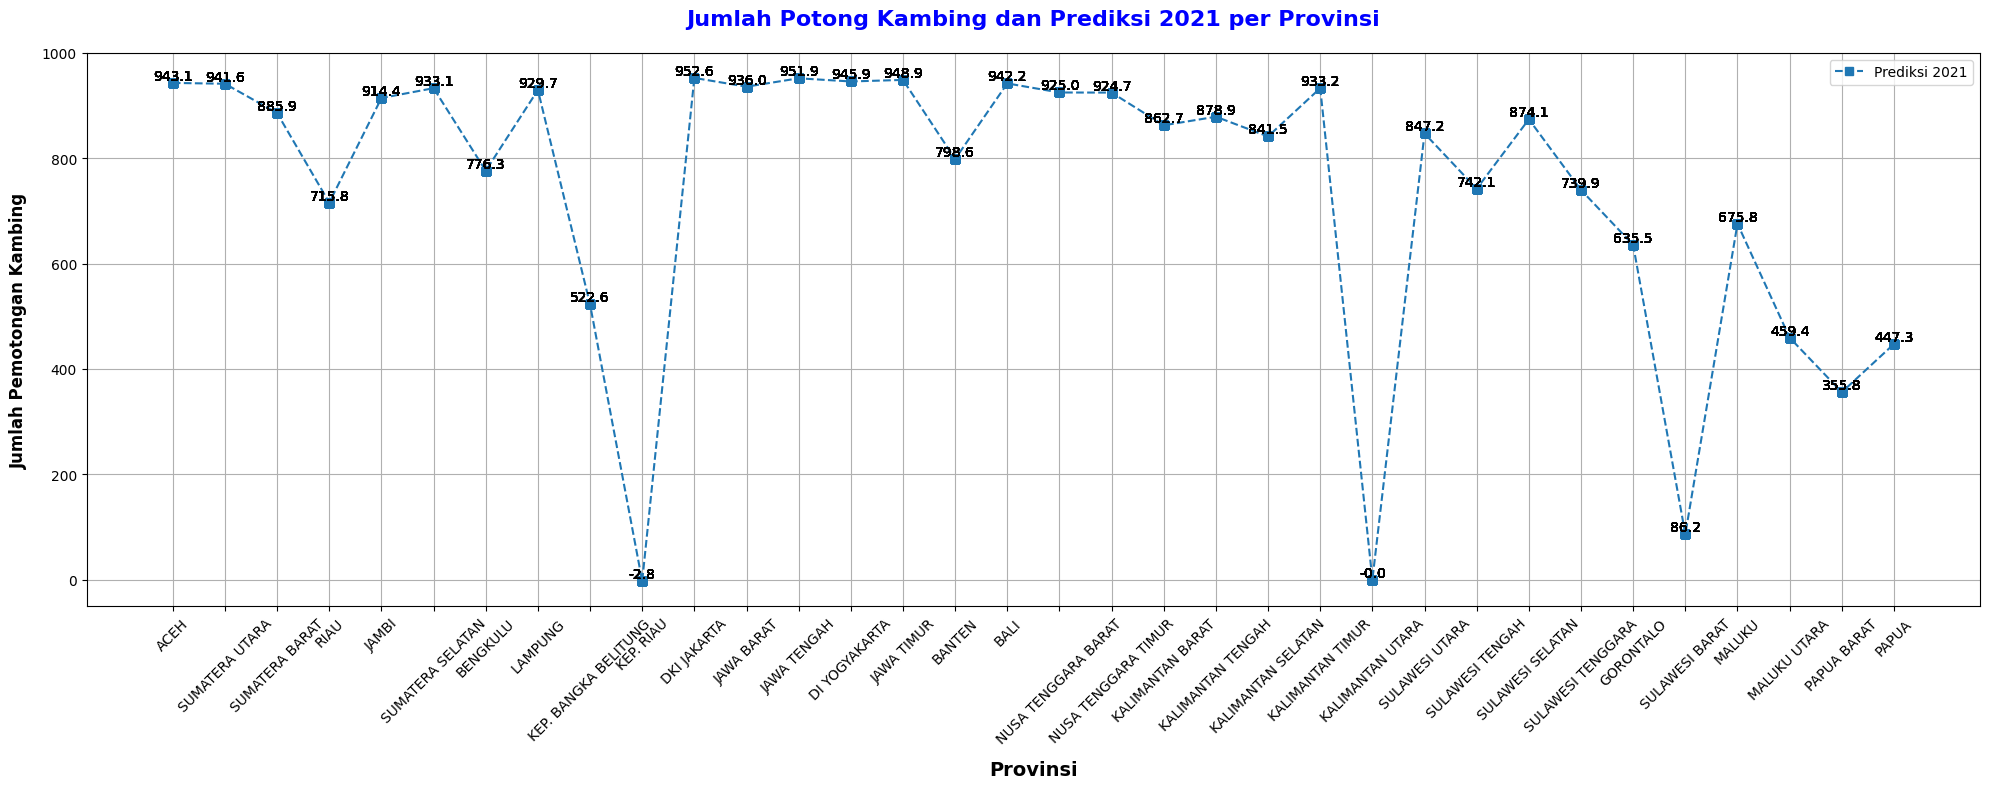

In [8]:
import matplotlib.pyplot as plt

filtered_data = data[['provinsi', 'tahun', 'Kambing', 'Prediksi 2021']]
plt.figure(figsize=(20, 8))

plt.plot(filtered_data['provinsi'], filtered_data['Prediksi 2021'], label='Prediksi 2021', linestyle='--', marker='s')

for i in range(len(filtered_data)):
    plt.text(filtered_data['provinsi'].iloc[i], filtered_data['Prediksi 2021'].iloc[i],
             f'{filtered_data["Prediksi 2021"].iloc[i]:.1f}', ha='center', va='bottom')

plt.title('Jumlah Potong Kambing dan Prediksi 2021 per Provinsi', fontweight='bold', fontsize=16, color='blue', pad=20)
plt.xlabel('Provinsi', fontweight='bold', fontsize=14, color='black', labelpad=10)
plt.ylabel('Jumlah Pemotongan Kambing', fontweight='bold', fontsize=12, color='black', labelpad=10)

plt.legend()
plt.grid(True)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


# ***Donwload Data Prediksi***

In [9]:
# Menyimpan data ke dalam file excel
data.to_excel('Data Prediksi Kambing.xlsx', index=False)